In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import itertools
import time
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score


from sklearn.feature_selection import RFE
import statsmodels.formula.api as sm

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
standard_predictors = ['duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'facenumber_in_poster', 'actor_2_facebook_likes', 'aspect_ratio']
predictors_actors = ['director_high', 'actor_1_high',  'actor_2_high', 'actor_3_high']
predictors_genre = ['action', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'history', 'horror', 'music', 'musical', 'mystery', 'romance', 'sport', 'thriller', 'war', 'western']
logistic_model = sm.logit(formula='profit_binary ~ ' + ' + '.join(predictors_actors) + ' + ' + ' + '.join(predictors_genre) + ' + ' + ' + '.join(standard_predictors), data=train).fit()


Optimization terminated successfully.
         Current function value: 0.339561
         Iterations 7


In [8]:
#summary
logistic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          profit_binary   No. Observations:                 3005
Model:                          Logit   Df Residuals:                     2976
Method:                           MLE   Df Model:                           28
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.5083
Time:                        17:07:42   Log-Likelihood:                -1020.4
converged:                       True   LL-Null:                       -2075.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.1816      0.560     -3.894      0.000      -3.280      -1.084
director_high                 1.5380      0.120     12.849      0.000       1.303       1.773
actor_1_high                  0.9081      0.123      7.355      0.000       0.666       1.150
actor_2_high                  1.6683      0.119     14.008      0.000       1.435       1.902
actor_3_high                  2.3943      0.118     20.272      0.000       2.163       2.626
action                       -0.0983      0.162     -0.608      0.543      -0.415       0.219
biography                     0.0945      0.255      0.371      0.711      -0.405       0.594
comedy                       -0.1708      0.156     -1.093      0.274      -0.477       0.135
crime                         0.0825      0.158      0.522      0.602      -0.227       0.392
documentary                   2.3691      0.525      4.510      0.000       1.339       3.399
drama                         0.1489      0.142      1.045      0.296      -0.130       0.428
history                       0.1886      0.317      0.595      0.552      -0.433       0.810
horror                        0.5413      0.225      2.401      0.016       0.099       0.983
music                        -0.0037      0.311     -0.012      0.990      -0.613       0.606
musical                       0.2629      0.416      0.632      0.527      -0.552       1.078
mystery                       0.0918      0.200      0.458      0.647      -0.301       0.485
romance                       0.1083      0.144      0.754      0.451      -0.173       0.390
sport                        -0.2821      0.286     -0.986      0.324      -0.842       0.278
thriller                     -0.0823      0.160     -0.514      0.607      -0.396       0.231
war                           0.2786      0.311      0.895      0.371      -0.331       0.888
western                      -0.2646      0.491     -0.539      0.590      -1.226       0.697
duration                     -0.0072      0.003     -2.239      0.025      -0.014      -0.001
director_facebook_likes    1.797e-07   1.88e-05      0.010      0.992   -3.66e-05    3.69e-05
actor_3_facebook_likes     7.688e-06   8.02e-05      0.096      0.924      -0.000       0.000
actor_1_facebook_likes     2.279e-05    4.7e-05      0.485      0.628   -6.93e-05       0.000
cast_total_facebook_likes -2.688e-05   4.68e-05     -0.574      0.566      -0.000    6.49e-05
facenumber_in_poster         -0.0086      0.028     -0.312      0.755      -0.063       0.046
actor_2_facebook_likes     1.888e-05   4.91e-05      0.385      0.701   -7.74e-05       0.000
aspect_ratio                 -0.2209      0.213     -1.036      0.300      -0.639       0.197
=============================================================================================
"""

## Looking at confusion matrix

0.9285809050452238


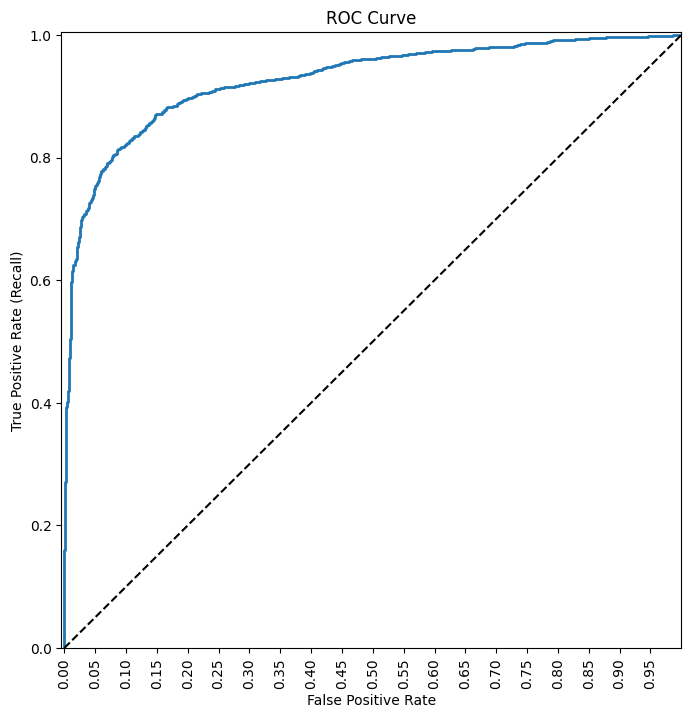

In [9]:
from sklearn.metrics import roc_curve, auc
y=train.profit_binary
ypred = logistic_model.predict(train)
fpr, tpr, auc_thresholds = roc_curve(y, ypred)
print(auc(fpr, tpr))# AUC of ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

fpr, tpr, auc_thresholds = roc_curve(y, ypred)
plot_roc_curve(fpr, tpr)

In [10]:
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

Classification accuracy = 88.4%
Precision = 88.5%
TPR or Recall = 90.4%
FNR = 9.6%
FPR = 13.9%
ROC-AUC = 93.5%


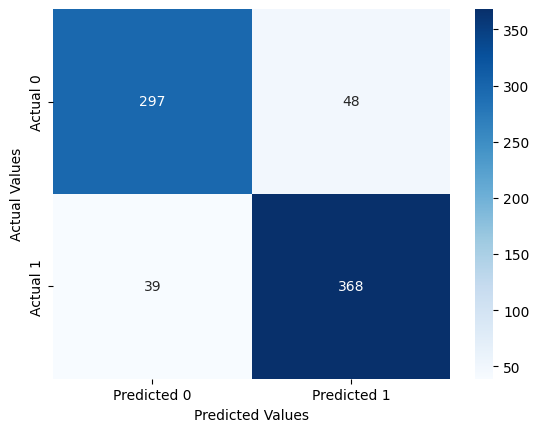

In [11]:
confusion_matrix_data(test,test.profit_binary,logistic_model,0.5)

Precision of 88.5%!

Now, we will investigate which predictors should be removed due to multicollinearity (as demonstrated in the VIF file) by attempting forward, backwards, and best subset selection.

## VIF

In [12]:
standard_predictors = ['duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'facenumber_in_poster', 'actor_2_facebook_likes', 'aspect_ratio']
predictors_actors = ['director_high', 'actor_1_high',  'actor_2_high', 'actor_3_high']
predictors_genre = ['action', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'history', 'horror', 'music', 'musical', 'mystery', 'romance', 'sport', 'thriller', 'war', 'western']
predictor_subset = predictors_actors + predictors_genre + standard_predictors
#make X from all predictors
X = train[predictor_subset]

In [13]:
#looking at VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

                      feature         VIF
0                       const   71.801215
1               director_high    1.327985
2                actor_1_high    1.377578
3                actor_2_high    1.567592
4                actor_3_high    1.639718
5                      action    1.444618
6                   biography    1.248165
7                      comedy    1.741391
8                       crime    1.236430
9                 documentary    1.074414
10                      drama    1.535821
11                    history    1.295977
12                     horror    1.332478
13                      music    1.051483
14                    musical    1.030973
15                    mystery    1.188126
16                    romance    1.179434
17                      sport    1.074692
18                   thriller    1.649509
19                        war    1.185939
20                    western    1.023754
21                   duration    1.376898
22    director_facebook_likes    1

In [14]:
print(vif_data.loc[vif_data.VIF > 10])

                      feature         VIF
0                       const   71.801215
24     actor_1_facebook_likes  228.974152
25  cast_total_facebook_likes  337.717888
27     actor_2_facebook_likes   20.674081


In [15]:
corr = train.corr()[["actor_1_facebook_likes", "cast_total_facebook_likes", "actor_2_facebook_likes"]]
corr > 0.5

,actor_1_facebook_likes,cast_total_facebook_likes,actor_2_facebook_likes
duration,False,False,False
director_facebook_likes,False,False,False
actor_3_facebook_likes,False,False,True
actor_1_facebook_likes,True,True,False
gross,False,False,False
cast_total_facebook_likes,True,True,True
facenumber_in_poster,False,False,False
budget,False,False,False
title_year,False,False,False
actor_2_facebook_likes,False,True,True


As we can see from above, cast_total_facebook_likes, actor_1_facebook_likes, and actor_2_facebook_likes suffer from multicollinearity. They are correlated. I will remove some of these variables to investigate how to reduce the multicollinearity amongst the predictiors.

In [16]:
#removing cast_total_facebook_likes
standard_predictors = ['duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'facenumber_in_poster', 'actor_2_facebook_likes', 'aspect_ratio']
predictors_actors = ['director_high', 'actor_1_high',  'actor_2_high', 'actor_3_high']
predictors_genre = ['action', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'history', 'horror', 'music', 'musical', 'mystery', 'romance', 'sport', 'thriller', 'war', 'western']
predictor_subset = predictors_actors + predictors_genre + standard_predictors
#make X from all predictors
X = train[predictor_subset]

In [17]:
#looking at VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

                    feature        VIF
0                     const  71.788253
1             director_high   1.327779
2              actor_1_high   1.376170
3              actor_2_high   1.560623
4              actor_3_high   1.639197
5                    action   1.442388
6                 biography   1.248054
7                    comedy   1.737041
8                     crime   1.236296
9               documentary   1.072105
10                    drama   1.532074
11                  history   1.295961
12                   horror   1.332420
13                    music   1.051272
14                  musical   1.030703
15                  mystery   1.188126
16                  romance   1.178943
17                    sport   1.074691
18                 thriller   1.649501
19                      war   1.184504
20                  western   1.023736
21                 duration   1.371566
22  director_facebook_likes   1.063309
23   actor_3_facebook_likes   1.429753
24   actor_1_facebook_lik

In [18]:
print(vif_data.loc[vif_data.VIF > 10])

  feature        VIF
0   const  71.788253


After removing "cast_total_facebook_likes", we observe no more multicollinearity in the data. I will be using this new subset of variables going forward.

## NEW MODEL EXCLUDING MULTICOLLINEARITY

In [19]:
logistic_model = sm.logit(formula='profit_binary ~ ' + ' + '.join(predictor_subset), data=train).fit()


Optimization terminated successfully.
         Current function value: 0.339615
         Iterations 7


In [20]:
logistic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          profit_binary   No. Observations:                 3005
Model:                          Logit   Df Residuals:                     2977
Method:                           MLE   Df Model:                           27
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.5083
Time:                        17:07:44   Log-Likelihood:                -1020.5
converged:                       True   LL-Null:                       -2075.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.1754      0.560     -3.883      0.000      -3.273      -1.078
director_high               1.5373      0.120     12.848      0.000       1.303       1.772
actor_1_high                0.9063      0.123      7.343      0.000       0.664       1.148
actor_2_high                1.6634      0.119     14.005      0.000       1.431       1.896
actor_3_high                2.3919      0.118     20.271      0.000       2.161       2.623
action                     -0.1009      0.162     -0.624      0.532      -0.418       0.216
biography                   0.0937      0.255      0.368      0.713      -0.405       0.593
comedy                     -0.1752      0.156     -1.123      0.262      -0.481       0.131
crime                       0.0821      0.158      0.519      0.604      -0.228       0.392
documentary                 2.3774      0.525      4.528      0.000       1.348       3.406
drama                       0.1513      0.142      1.063      0.288      -0.128       0.430
history                     0.1856      0.317      0.586      0.558      -0.435       0.806
horror                      0.5419      0.225      2.404      0.016       0.100       0.984
music                      -0.0065      0.311     -0.021      0.983      -0.616       0.603
musical                     0.2630      0.415      0.633      0.527      -0.551       1.077
mystery                     0.0912      0.200      0.455      0.649      -0.302       0.484
romance                     0.1122      0.143      0.782      0.434      -0.169       0.393
sport                      -0.2811      0.286     -0.983      0.326      -0.841       0.279
thriller                   -0.0819      0.160     -0.511      0.609      -0.396       0.232
war                         0.2858      0.310      0.920      0.357      -0.323       0.894
western                    -0.2638      0.490     -0.539      0.590      -1.223       0.696
duration                   -0.0074      0.003     -2.288      0.022      -0.014      -0.001
director_facebook_likes -2.338e-07   1.87e-05     -0.012      0.990    -3.7e-05    3.65e-05
actor_3_facebook_likes  -3.384e-05   3.31e-05     -1.023      0.306   -9.86e-05     3.1e-05
actor_1_facebook_likes  -4.093e-06   4.21e-06     -0.971      0.331   -1.24e-05    4.17e-06
facenumber_in_poster       -0.0084      0.028     -0.305      0.760      -0.062       0.046
actor_2_facebook_likes  -8.138e-06   1.42e-05     -0.575      0.565   -3.59e-05    1.96e-05
aspect_ratio               -0.2217      0.213     -1.039      0.299      -0.640       0.196
===========================================================================================
"""

0.9286294322231146


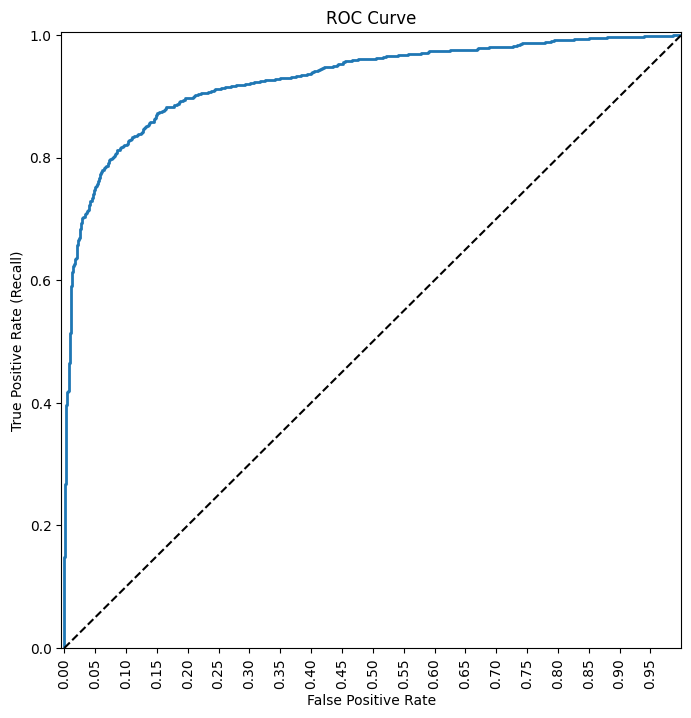

In [21]:
from sklearn.metrics import roc_curve, auc
y=train.profit_binary
ypred = logistic_model.predict(train)
fpr, tpr, auc_thresholds = roc_curve(y, ypred)
print(auc(fpr, tpr))# AUC of ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

fpr, tpr, auc_thresholds = roc_curve(y, ypred)
plot_roc_curve(fpr, tpr)

In [22]:
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

Classification accuracy = 88.4%
Precision = 88.5%
TPR or Recall = 90.4%
FNR = 9.6%
FPR = 13.9%
ROC-AUC = 93.5%


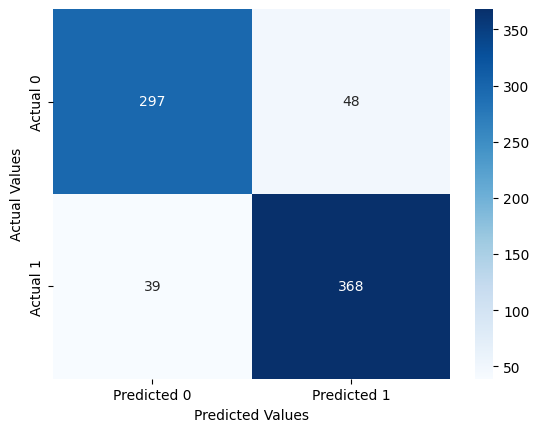

In [23]:
confusion_matrix_data(test,test.profit_binary,logistic_model,0.5)

Precision is still at 88.5% after taking into account multicollinearity.

## Looking at potential interaction terms

It might be that instead of just removing the variable, we could include interactions to remove collinearity. We will investigate whether this model has a higher precision or not.

In [24]:
standard_predictors = ['duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'facenumber_in_poster', 'actor_2_facebook_likes', 'aspect_ratio']
logistic_model = sm.logit(formula='profit_binary ~ ' + ' + '.join(predictors_actors) + ' + ' + ' + '.join(predictors_genre) + ' + ' + ' + '.join(standard_predictors)  + '+actor_1_facebook_likes*cast_total_facebook_likes+cast_total_facebook_likes*actor_2_facebook_likes', data=train).fit()
logistic_model.summary()

Optimization terminated successfully.
         Current function value: 0.335988
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          profit_binary   No. Observations:                 3005
Model:                          Logit   Df Residuals:                     2974
Method:                           MLE   Df Model:                           30
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.5135
Time:                        17:07:45   Log-Likelihood:                -1009.6
converged:                       True   LL-Null:                       -2075.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           -2.3043      0.533     -4.320      0.000      -3.350      -1.259
director_high                                        1.5457      0.121     12.817      0.000       1.309       1.782
actor_1_high                                         1.0422      0.128      8.165      0.000       0.792       1.292
actor_2_high                                         1.6884      0.120     14.036      0.000       1.453       1.924
actor_3_high                                         2.3971      0.119     20.156      0.000       2.164       2.630
action                                              -0.1138      0.163     -0.700      0.484      -0.432       0.205
biography                                            0.1400      0.256      0.548      0.584      -0.361       0.641
comedy                                              -0.2106      0.157     -1.343      0.179      -0.518       0.097
crime                                                0.0818      0.159      0.516      0.606      -0.229       0.393
documentary                                          2.2619      0.526      4.302      0.000       1.231       3.293
drama                                                0.1540      0.143      1.075      0.282      -0.127       0.435
history                                              0.1199      0.318      0.377      0.706      -0.503       0.743
horror                                               0.4877      0.227      2.146      0.032       0.042       0.933
music                                               -0.0461      0.314     -0.147      0.883      -0.662       0.569
musical                                              0.1712      0.420      0.407      0.684      -0.653       0.995
mystery                                              0.1040      0.201      0.517      0.605      -0.290       0.498
romance                                              0.1068      0.144      0.740      0.459      -0.176       0.389
sport                                               -0.2881      0.289     -0.998      0.318      -0.854       0.278
thriller                                            -0.0544      0.161     -0.338      0.735      -0.370       0.261
war                                                  0.2858      0.313      0.913      0.361      -0.328       0.900
western                                             -0.1772      0.500     -0.354      0.723      -1.158       0.804
duration                                            -0.0065      0.003     -1.995      0.046      -0.013      -0.000
director_facebook_likes                            5.79e-06   1.91e-05      0.303      0.762   -3.16e-05    4.32e-05
actor_3_facebook_likes                           -2.108e-05   8.37e-05     -0.252      0.801      -0.000       0.000
actor_1_facebook_likes                           -1.627e-05   5.13e-05     -0.317 

Classification accuracy = 87.1%
Precision = 87.6%
TPR or Recall = 88.7%
FNR = 11.3%
FPR = 14.8%
ROC-AUC = 93.6%


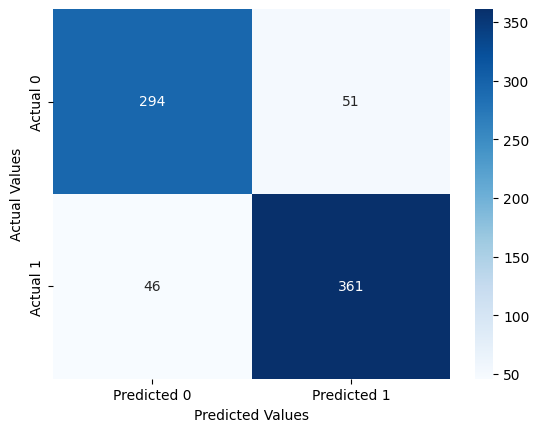

In [25]:
confusion_matrix_data(test,test.profit_binary,logistic_model,0.5)

As we can see, this actually reduces precision (from 88.5 to 87.6), so we did not include these interaction terms. 

## FORWARD SELECTION

In [26]:
#make X from all predictors
X = train[predictor_subset]
X.columns

Index(['director_high', 'actor_1_high', 'actor_2_high', 'actor_3_high',
       'action', 'biography', 'comedy', 'crime', 'documentary', 'drama',
       'history', 'horror', 'music', 'musical', 'mystery', 'romance', 'sport',
       'thriller', 'war', 'western', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes',
       'facenumber_in_poster', 'actor_2_facebook_likes', 'aspect_ratio'],
      dtype='object')

In [27]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(1, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Log likelihood')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(1, 2, 2)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')

In [28]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.logit('profit_binary~' + '+'.join(predictor_subset),data = train).fit(disp=0)
    Rsquared = model.llf
    return {"model":model, "Rsquared":Rsquared}

In [29]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:        
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [30]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [31]:
models_best = forward_selection()

Processed  27 models on 1 predictors in 0.2440190315246582 seconds.
Processed  26 models on 2 predictors in 0.2632179260253906 seconds.
Processed  25 models on 3 predictors in 0.24464869499206543 seconds.
Processed  24 models on 4 predictors in 0.2480151653289795 seconds.
Processed  23 models on 5 predictors in 0.25342464447021484 seconds.
Processed  22 models on 6 predictors in 0.2595028877258301 seconds.
Processed  21 models on 7 predictors in 0.2803342342376709 seconds.
Processed  20 models on 8 predictors in 0.29165053367614746 seconds.
Processed  19 models on 9 predictors in 0.2753596305847168 seconds.
Processed  18 models on 10 predictors in 0.2725410461425781 seconds.
Processed  17 models on 11 predictors in 0.2867565155029297 seconds.
Processed  16 models on 12 predictors in 0.32599687576293945 seconds.
Processed  15 models on 13 predictors in 0.3182373046875 seconds.
Processed  14 models on 14 predictors in 0.3018491268157959 seconds.
Processed  13 models on 15 predictors in 0

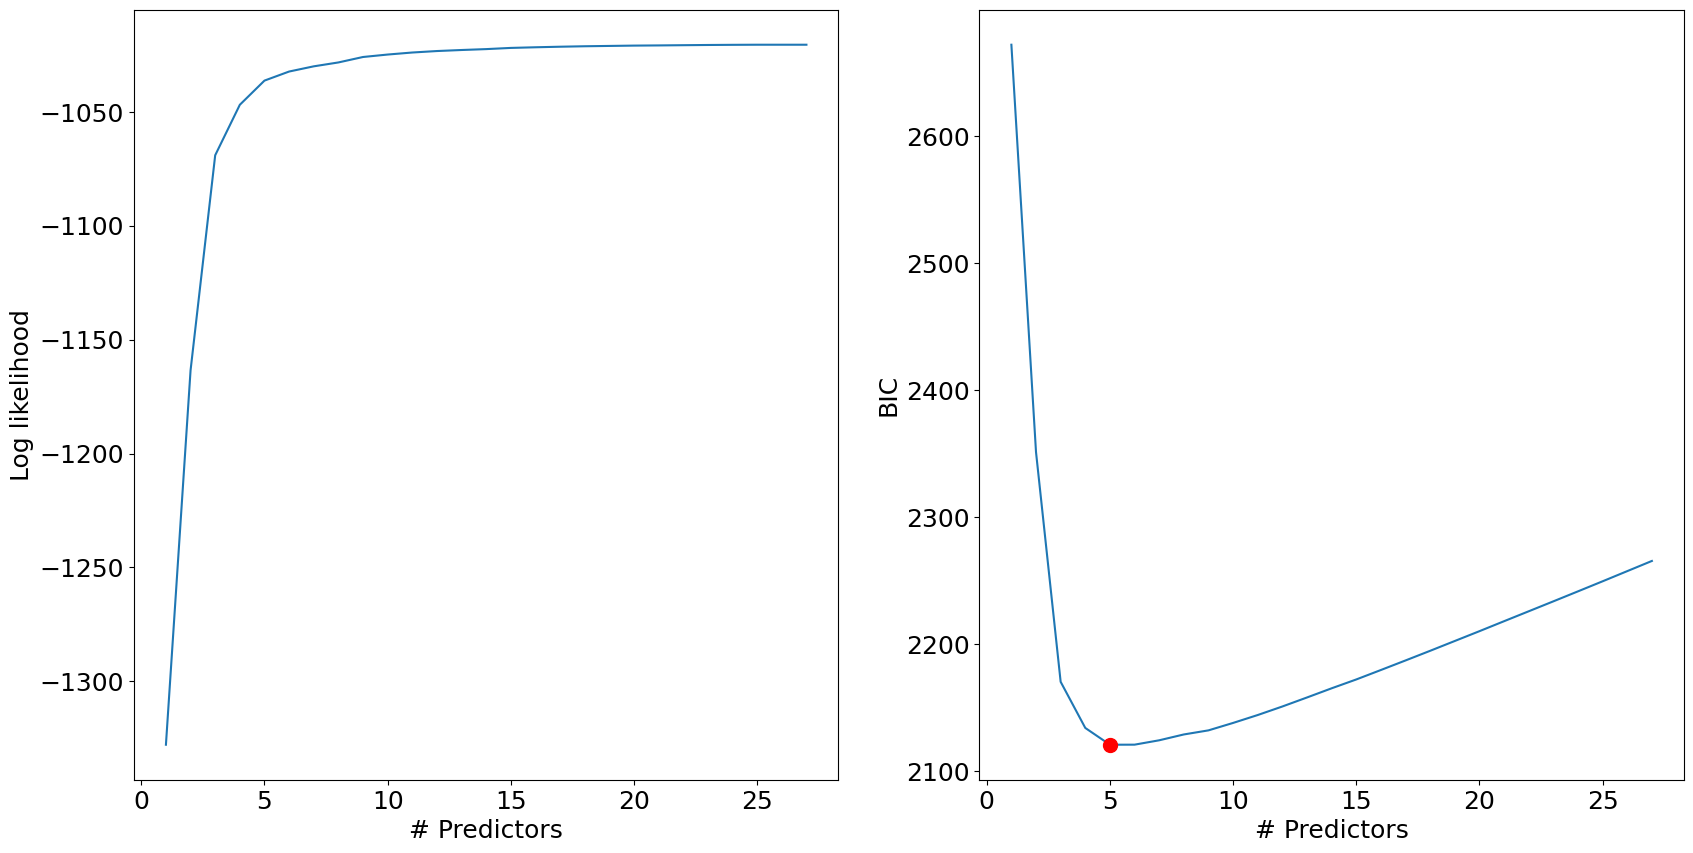

In [32]:
best_sub_plots()

In [33]:
best_fwd_reg_model = models_best['model'][5]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          profit_binary   No. Observations:                 3005
Model:                          Logit   Df Residuals:                     2999
Method:                           MLE   Df Model:                            5
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.5007
Time:                        17:07:53   Log-Likelihood:                -1036.3
converged:                       True   LL-Null:                       -2075.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.3618      0.132    -25.408      0.000      -3.621      -3.102
actor_3_high      2.3449      0.114     20.482      0.000       2.120       2.569
actor_2_high      1.6181      0.116     13.927      0.000       1.390       1.846
director_high     1.5056      0.117     12.891      0.000       1.277       1.735
actor_1_high      0.8220      0.119      6.892      0.000       0.588       1.056
documentary       2.4966      0.488      5.116      0.000       1.540       3.453
=================================================================================
"""

Classification accuracy = 88.0%
Precision = 88.2%
TPR or Recall = 89.9%
FNR = 10.1%
FPR = 14.2%
ROC-AUC = 93.2%


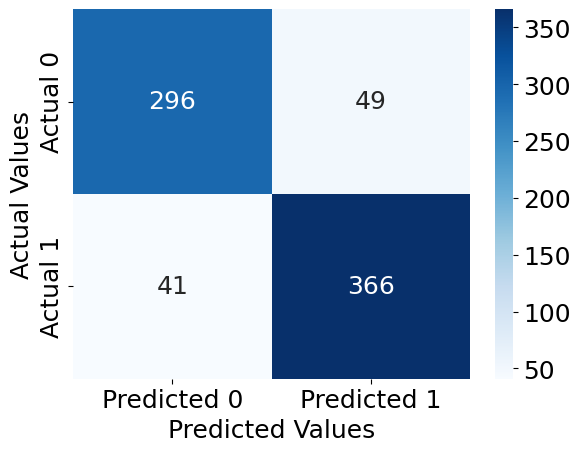

In [34]:
confusion_matrix_data(test,test.profit_binary,best_fwd_reg_model,0.5)

Precision went down from 88.5% to 88.2%, so it might be that forward selection is not the best model to optimize precision. 

## BACKWARDS

In [35]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [36]:
def backward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"], index = range(1,len(X.columns)))

    tic = time.time()
    predictors = X.columns
    models_best.loc[len(predictors)] = processSubset(predictors)
    
    while(len(predictors) > 1):  
        models_best.loc[len(predictors)-1] = backward(predictors)
        predictors = models_best.loc[len(predictors)-1]["model"].params.index[1:]

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [37]:
models_best = backward_selection()


Processed  27 models on 26 predictors in 1.3665637969970703 seconds.
Processed  26 models on 25 predictors in 0.8842499256134033 seconds.
Processed  25 models on 24 predictors in 0.8060553073883057 seconds.
Processed  24 models on 23 predictors in 0.7760488986968994 seconds.
Processed  23 models on 22 predictors in 0.7399082183837891 seconds.
Processed  22 models on 21 predictors in 0.6707403659820557 seconds.
Processed  21 models on 20 predictors in 0.7242307662963867 seconds.
Processed  20 models on 19 predictors in 0.8016645908355713 seconds.
Processed  19 models on 18 predictors in 0.6882314682006836 seconds.
Processed  18 models on 17 predictors in 0.38072657585144043 seconds.
Processed  17 models on 16 predictors in 0.3442349433898926 seconds.
Processed  16 models on 15 predictors in 0.3045487403869629 seconds.
Processed  15 models on 14 predictors in 0.28534650802612305 seconds.
Processed  14 models on 13 predictors in 0.25899600982666016 seconds.
Processed  13 models on 12 pred

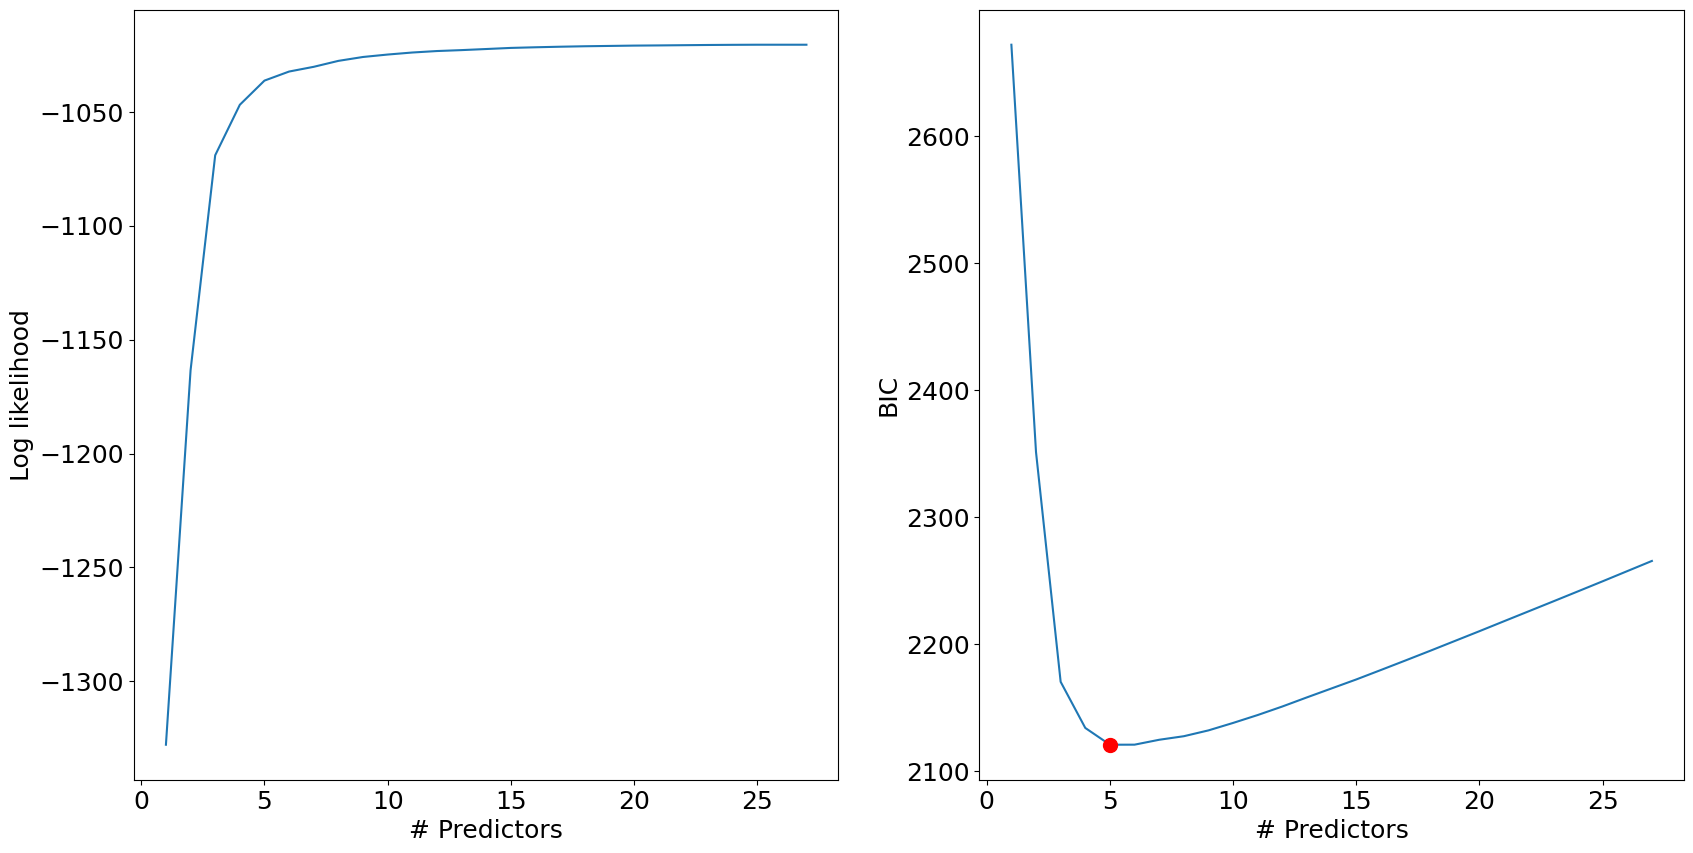

In [38]:
best_sub_plots()

In [39]:
best_bwd_reg_model = models_best['model'][5]
best_bwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          profit_binary   No. Observations:                 3005
Model:                          Logit   Df Residuals:                     2999
Method:                           MLE   Df Model:                            5
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.5007
Time:                        17:08:05   Log-Likelihood:                -1036.3
converged:                       True   LL-Null:                       -2075.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.3618      0.132    -25.408      0.000      -3.621      -3.102
director_high     1.5056      0.117     12.891      0.000       1.277       1.735
actor_1_high      0.8220      0.119      6.892      0.000       0.588       1.056
actor_2_high      1.6181      0.116     13.927      0.000       1.390       1.846
actor_3_high      2.3449      0.114     20.482      0.000       2.120       2.569
documentary       2.4966      0.488      5.116      0.000       1.540       3.453
=================================================================================
"""

Classification accuracy = 88.0%
Precision = 88.2%
TPR or Recall = 89.9%
FNR = 10.1%
FPR = 14.2%
ROC-AUC = 93.2%


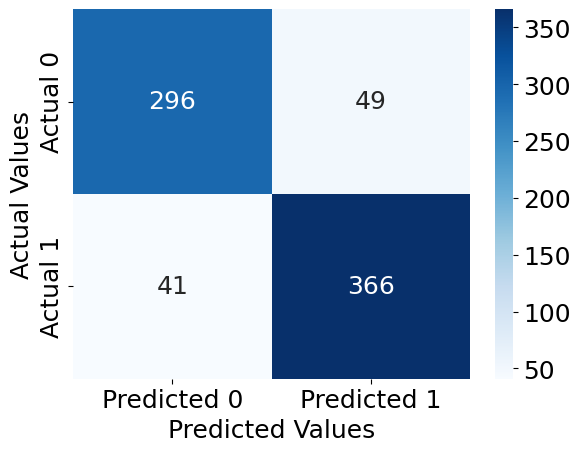

In [40]:
confusion_matrix_data(test,test.profit_binary,best_bwd_reg_model,0.5)

Precision went down from 88.5% to 88.2%, so it might be that backwards selection is not the best model to optimize precision.

## BEST SUBSET SELECTION

In [41]:
#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [42]:
#Function to select the best model amongst the best models for 'k' predictors, where k = 1,2,3,..
#models_best = pd.DataFrame(columns=["Rsquared", "model"])

#tic = time.time()
#for i in range(1,1+X.shape[1]):
#    models_best.loc[i] = getBest_model(i)

#toc = time.time()
#print("Total elapsed time:", (toc-tic), "seconds.")

The code took way to long to run, so we decided against it.

## PROBLEM: 
The cast profitability variables might pose a problem as creating them was based on average profit of each variable. Due to the fact that only half the actors's names showed up more than once, then the actor names might just be a reflection of profit in different scenarios. This might be a worry since the addition of this variables raised the model from around 50% to 90% precision when predicting whether a movie was profitable or not. In order to investigate this hypothesis, we sought to remake the model without the cast profitability variables.

In [74]:
standard_predictors = ['duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'facenumber_in_poster', 'actor_2_facebook_likes', 'aspect_ratio']
logistic_model = sm.logit(formula='profit_binary ~ ' + ' +  '.join(predictors_genre) + ' + ' + ' + '.join(standard_predictors), data=train).fit()

Optimization terminated successfully.
         Current function value: 0.671876
         Iterations 5


In [75]:
logistic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          profit_binary   No. Observations:                 3005
Model:                          Logit   Df Residuals:                     2981
Method:                           MLE   Df Model:                           23
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                 0.02716
Time:                        17:10:11   Log-Likelihood:                -2019.0
converged:                       True   LL-Null:                       -2075.4
Covariance Type:            nonrobust   LLR p-value:                 8.293e-14
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.5380      0.366      1.468      0.142      -0.180       1.256
action                     -0.1788      0.104     -1.719      0.086      -0.383       0.025
biography                  -0.0507      0.170     -0.297      0.766      -0.385       0.283
comedy                      0.2189      0.100      2.185      0.029       0.023       0.415
crime                      -0.1074      0.105     -1.019      0.308      -0.314       0.099
documentary                 0.7164      0.363      1.975      0.048       0.005       1.427
drama                      -0.2808      0.092     -3.061      0.002      -0.461      -0.101
history                    -0.3172      0.218     -1.457      0.145      -0.744       0.109
horror                      0.4820      0.143      3.368      0.001       0.201       0.762
music                       0.2448      0.196      1.251      0.211      -0.139       0.628
musical                     0.0321      0.237      0.136      0.892      -0.432       0.496
mystery                     0.0271      0.133      0.204      0.838      -0.233       0.287
romance                     0.0660      0.095      0.691      0.489      -0.121       0.253
sport                       0.0690      0.198      0.348      0.728      -0.319       0.457
thriller                   -0.0261      0.105     -0.249      0.803      -0.231       0.179
war                        -0.4543      0.207     -2.190      0.029      -0.861      -0.048
western                    -0.5532      0.341     -1.622      0.105      -1.222       0.115
duration                    0.0053      0.002      2.702      0.007       0.001       0.009
director_facebook_likes   4.22e-05   1.38e-05      3.066      0.002    1.52e-05    6.92e-05
actor_3_facebook_likes   3.307e-05   2.74e-05      1.207      0.228   -2.06e-05    8.68e-05
actor_1_facebook_likes  -1.933e-07   2.54e-06     -0.076      0.939   -5.18e-06    4.79e-06
facenumber_in_poster       -0.0078      0.018     -0.425      0.671      -0.044       0.028
actor_2_facebook_likes   2.157e-05   1.22e-05      1.764      0.078   -2.39e-06    4.55e-05
aspect_ratio               -0.4676      0.147     -3.184      0.001      -0.755      -0.180
===========================================================================================
"""

0.6162176938104251


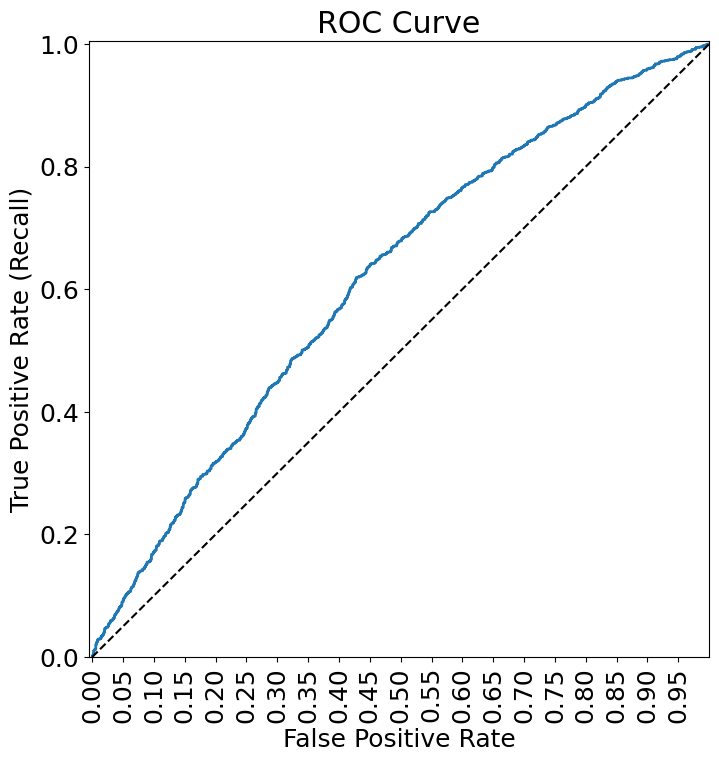

In [76]:
from sklearn.metrics import roc_curve, auc
y=train.profit_binary
ypred = logistic_model.predict(train)
fpr, tpr, auc_thresholds = roc_curve(y, ypred)
print(auc(fpr, tpr))# AUC of ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

fpr, tpr, auc_thresholds = roc_curve(y, ypred)
plot_roc_curve(fpr, tpr)

Classification accuracy = 60.1%
Precision = 61.5%
TPR or Recall = 70.5%
FNR = 29.5%
FPR = 52.2%
ROC-AUC = 62.4%


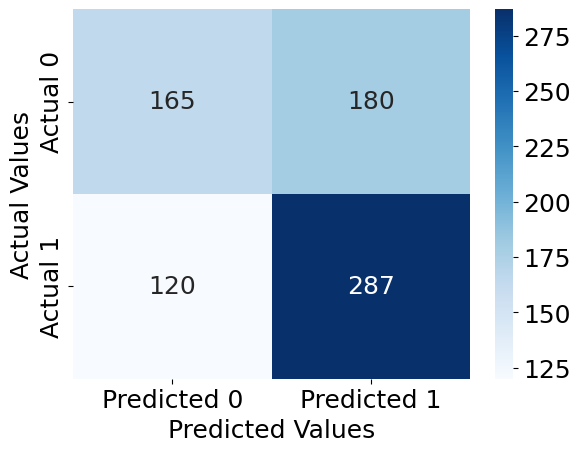

In [77]:
confusion_matrix_data(test,test.profit_binary,logistic_model,0.5)

As we can see, when we remove the variables for the profitability of the cast, the precision of the model only increases slightly. This made us worry about the validity of using the variable.

We further investigated how we could improve the model by aplying all the model transformations we had previously used (fwd, bwd, best, lasso, ridge).

## VIF

In [78]:
X = train[["action", "drama", "aspect_ratio", "director_facebook_likes", "actor_3_facebook_likes", "actor_1_facebook_likes", "actor_2_facebook_likes"]]

In [79]:
#looking at VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

                   feature        VIF
0                    const  34.126051
1                   action   1.111994
2                    drama   1.079784
3             aspect_ratio   1.038257
4  director_facebook_likes   1.021092
5   actor_3_facebook_likes   1.396108
6   actor_1_facebook_likes   1.177303
7   actor_2_facebook_likes   1.542478


As we can see, there is no multicollinearity.

We will now investigate if we can improve the model using variable selection.

## FORWARD SELECTION

In [57]:
predictor_subset = predictors_genre + standard_predictors
#make X from all predictors
X = train[predictor_subset]
X.columns

Index(['action', 'biography', 'comedy', 'crime', 'documentary', 'drama',
       'history', 'horror', 'music', 'musical', 'mystery', 'romance', 'sport',
       'thriller', 'war', 'western', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes',
       'cast_total_facebook_likes', 'facenumber_in_poster',
       'actor_2_facebook_likes', 'aspect_ratio'],
      dtype='object')

In [58]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(1, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Log likelihood')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(1, 2, 2)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')

In [59]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.logit('profit_binary~' + '+'.join(predictor_subset),data = train).fit(disp=0)
    Rsquared = model.llf
    return {"model":model, "Rsquared":Rsquared}

In [60]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:        
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [61]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [62]:
models_best = forward_selection()

Processed  24 models on 1 predictors in 0.13732457160949707 seconds.
Processed  23 models on 2 predictors in 0.15214300155639648 seconds.
Processed  22 models on 3 predictors in 0.25803637504577637 seconds.
Processed  21 models on 4 predictors in 0.245527982711792 seconds.
Processed  20 models on 5 predictors in 0.24969244003295898 seconds.
Processed  19 models on 6 predictors in 0.20190024375915527 seconds.
Processed  18 models on 7 predictors in 0.20592713356018066 seconds.
Processed  17 models on 8 predictors in 0.32024145126342773 seconds.
Processed  16 models on 9 predictors in 0.21575403213500977 seconds.
Processed  15 models on 10 predictors in 0.24590396881103516 seconds.
Processed  14 models on 11 predictors in 0.2177746295928955 seconds.
Processed  13 models on 12 predictors in 0.20522594451904297 seconds.
Processed  12 models on 13 predictors in 0.20146536827087402 seconds.
Processed  11 models on 14 predictors in 0.19757390022277832 seconds.
Processed  10 models on 15 predi

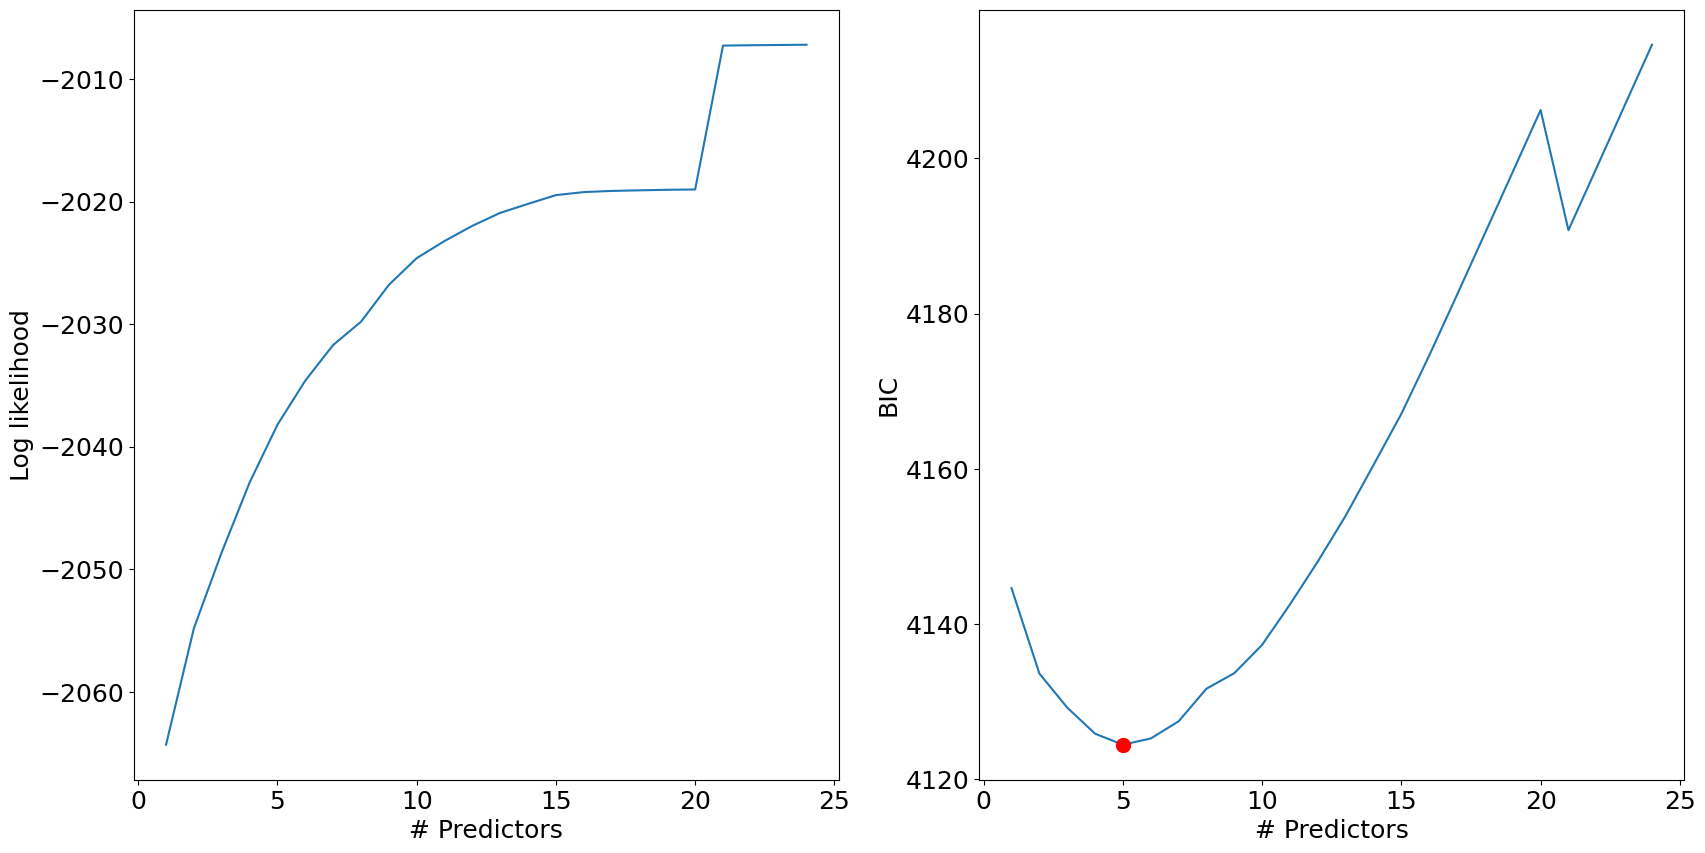

In [63]:
best_sub_plots()

In [64]:
best_fwd_reg_model = models_best['model'][5]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          profit_binary   No. Observations:                 3005
Model:                          Logit   Df Residuals:                     2999
Method:                           MLE   Df Model:                            5
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                 0.01790
Time:                        17:08:12   Log-Likelihood:                -2038.2
converged:                       True   LL-Null:                       -2075.4
Covariance Type:            nonrobust   LLR p-value:                 1.313e-14
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.4081      0.294      4.784      0.000       0.831       1.985
drama                      -0.4305      0.077     -5.556      0.000      -0.582      -0.279
aspect_ratio               -0.4990      0.141     -3.530      0.000      -0.776      -0.222
director_facebook_likes   4.12e-05   1.34e-05      3.077      0.002     1.5e-05    6.74e-05
action                     -0.3253      0.092     -3.536      0.000      -0.506      -0.145
actor_2_facebook_likes    2.81e-05   9.63e-06      2.919      0.004    9.23e-06     4.7e-05
===========================================================================================
"""

As we can see, different variables were selected in this case compared to the initial model. 

Classification accuracy = 57.2%
Precision = 58.8%
TPR or Recall = 69.5%
FNR = 30.5%
FPR = 57.4%
ROC-AUC = 58.9%


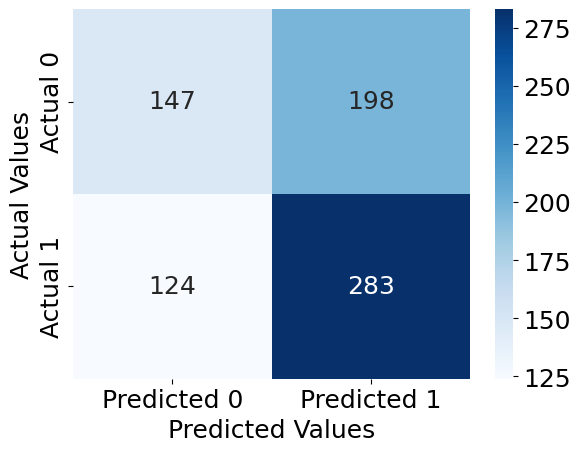

In [65]:
confusion_matrix_data(test,test.profit_binary,best_fwd_reg_model,0.5)

Again, precision does not increase when using forward selection.

## BACKWARDS

In [66]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [67]:
def backward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"], index = range(1,len(X.columns)))

    tic = time.time()
    predictors = X.columns
    models_best.loc[len(predictors)] = processSubset(predictors)
    
    while(len(predictors) > 1):  
        models_best.loc[len(predictors)-1] = backward(predictors)
        predictors = models_best.loc[len(predictors)-1]["model"].params.index[1:]

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [68]:
models_best = backward_selection()


Processed  24 models on 23 predictors in 0.8122162818908691 seconds.
Processed  23 models on 22 predictors in 0.7634420394897461 seconds.
Processed  22 models on 21 predictors in 0.6138613224029541 seconds.
Processed  21 models on 20 predictors in 0.6246623992919922 seconds.
Processed  20 models on 19 predictors in 0.5332009792327881 seconds.
Processed  19 models on 18 predictors in 0.5725367069244385 seconds.
Processed  18 models on 17 predictors in 0.3901045322418213 seconds.
Processed  17 models on 16 predictors in 0.335906982421875 seconds.
Processed  16 models on 15 predictors in 0.2916405200958252 seconds.
Processed  15 models on 14 predictors in 0.2895944118499756 seconds.
Processed  14 models on 13 predictors in 0.24166178703308105 seconds.
Processed  13 models on 12 predictors in 0.22054743766784668 seconds.
Processed  12 models on 11 predictors in 0.19184350967407227 seconds.
Processed  11 models on 10 predictors in 0.19402718544006348 seconds.
Processed  10 models on 9 predi

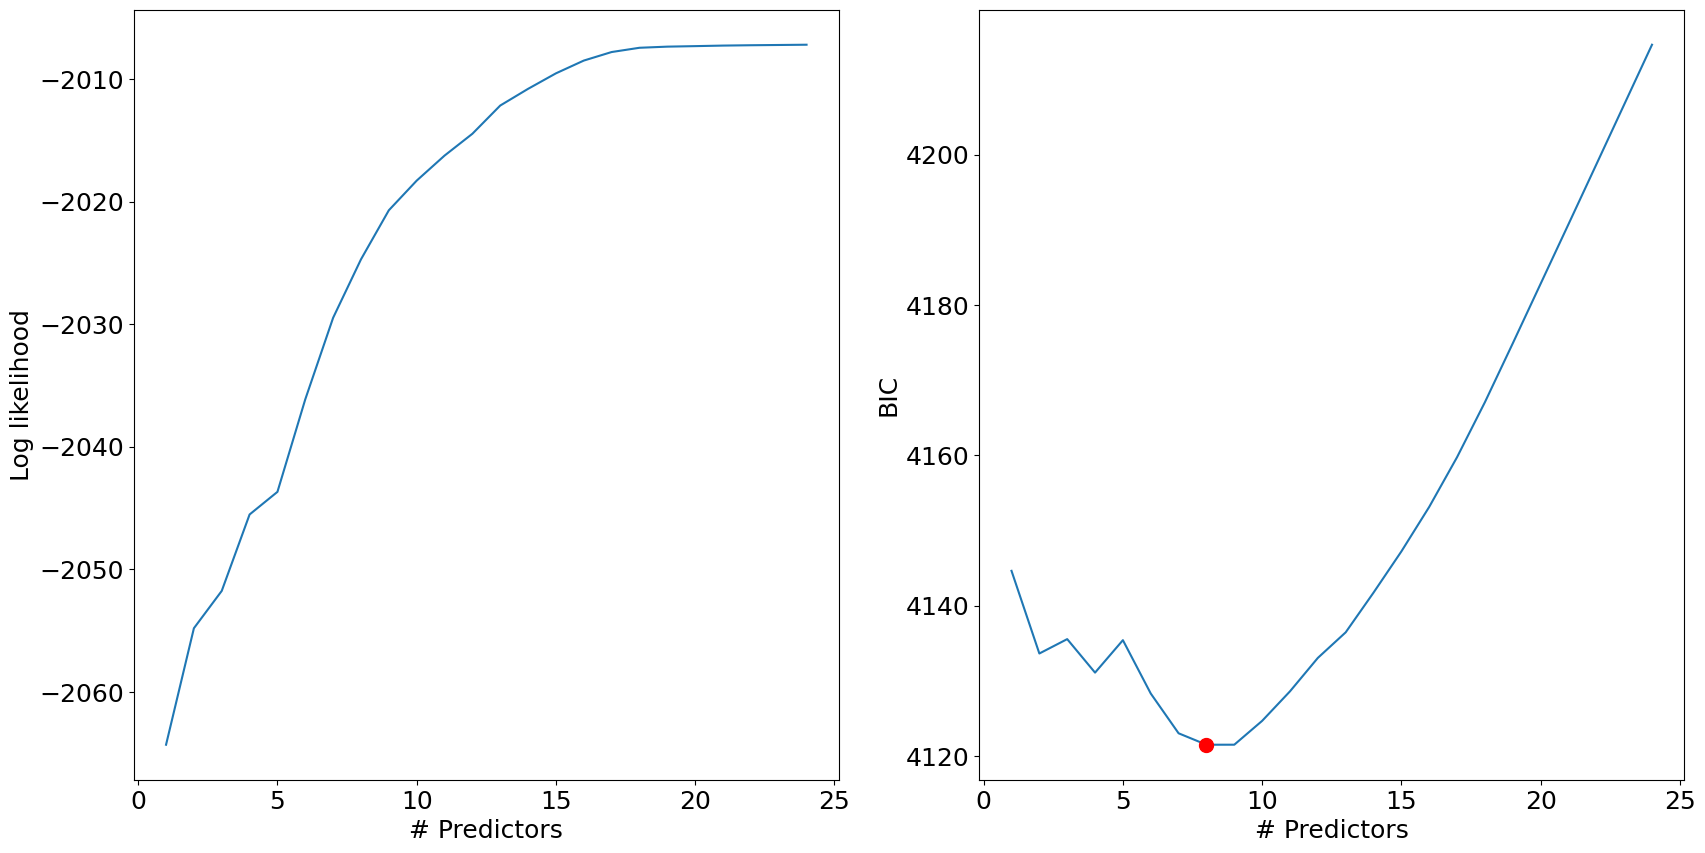

In [69]:
best_sub_plots()

In [70]:
best_bwd_reg_model = models_best['model'][8]
best_bwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          profit_binary   No. Observations:                 3005
Model:                          Logit   Df Residuals:                     2996
Method:                           MLE   Df Model:                            8
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                 0.02440
Time:                        17:08:20   Log-Likelihood:                -2024.7
converged:                       True   LL-Null:                       -2075.4
Covariance Type:            nonrobust   LLR p-value:                 2.350e-18
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.3075      0.296      4.413      0.000       0.727       1.888
action                       -0.3349      0.092     -3.623      0.000      -0.516      -0.154
drama                        -0.3921      0.078     -5.016      0.000      -0.545      -0.239
director_facebook_likes    4.072e-05   1.35e-05      3.012      0.003    1.42e-05    6.72e-05
actor_3_facebook_likes       -0.0003   6.47e-05     -3.953      0.000      -0.000      -0.000
actor_1_facebook_likes       -0.0002   4.43e-05     -4.717      0.000      -0.000      -0.000
cast_total_facebook_likes     0.0002   4.42e-05      4.712      0.000       0.000       0.000
actor_2_facebook_likes       -0.0002   4.67e-05     -4.138      0.000      -0.000      -0.000
aspect_ratio                 -0.5190      0.142     -3.651      0.000      -0.798      -0.240
=============================================================================================
"""

Classification accuracy = 57.8%
Precision = 60.1%
TPR or Recall = 65.6%
FNR = 34.4%
FPR = 51.3%
ROC-AUC = 58.6%


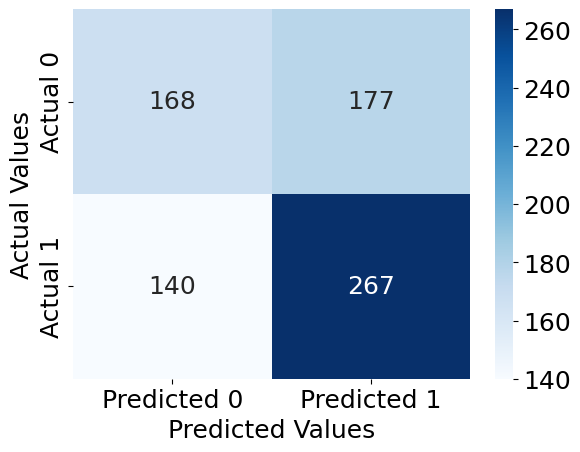

In [71]:
confusion_matrix_data(test,test.profit_binary,best_bwd_reg_model,0.5)

In this case, backwards selection did lead to a better precision from 57.2% to 60.1%. The variables selected are action, drama, the facebook likes variables, and aspect_ratio. On another hand, one might expect multicollinearity amonst the facebook like variables. We investigated VIF for this model to further investigate this:

In [72]:
X = train[["action", "drama", "aspect_ratio", "cast_total_facebook_likes", "director_facebook_likes", "actor_3_facebook_likes", "actor_2_facebook_likes"]]

In [73]:
#looking at VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

                     feature        VIF
0                      const  34.137421
1                     action   1.112161
2                      drama   1.079577
3               aspect_ratio   1.038270
4  cast_total_facebook_likes   1.733860
5    director_facebook_likes   1.021301
6     actor_3_facebook_likes   1.451828
7     actor_2_facebook_likes   1.878275
